In [2]:
%cd C:\Users\86198\hw_wp
%run EddyDetection.ipynb

C:\Users\86198\hw_wp


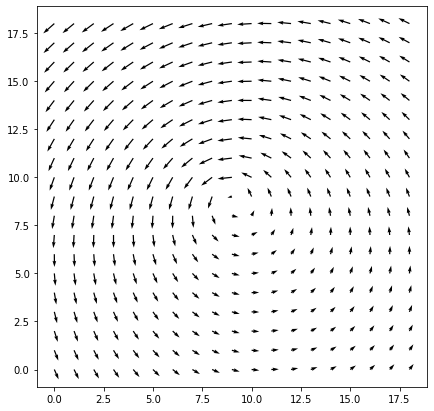

In [3]:
def f(x, y):
    return np.sqrt((x-8.9)**2 + (y-8.9)**2)-0.2*x+0.3*y

testX = np.arange(19)
testY = np.arange(19)
testX, testY = np.meshgrid(testX, testY)
testC = f(testX, testY)
testU, testV = np.gradient(testC)
testU = -testU

plt.figure(figsize=(7,7))
plt.quiver(testU, testV)



## 获取候选点 ##
x方向相邻两点若y方向速度符号相反，则该两点皆为候选点

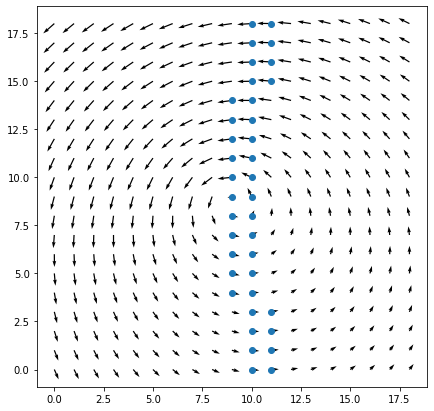

In [4]:
candidate = Elect(testV)
plt.figure(figsize=(7,7))
plt.quiver(testU, testV)
plt.scatter(candidate[...,1], candidate[...,0])

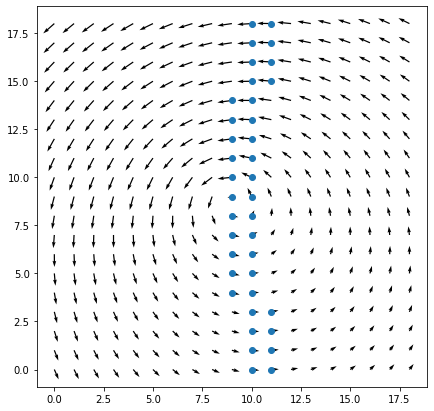

In [5]:
candidate = Elect(testV)
plt.figure(figsize=(7,7))
plt.quiver(testU, testV)
plt.scatter(candidate[...,1], candidate[...,0])

## 第一约束条件 ##
若候选点在x方向上距离在a以内的点y方向速度从左到右符号由负到正且速率先变小后变大，则保留该候选点，否则将其剔除

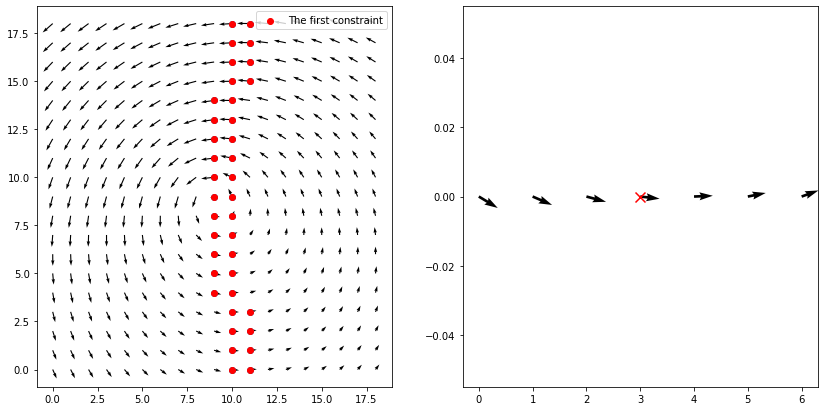

In [6]:
candidate2 = first_constraint(testV, candidate)
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.quiver(testU, testV)
plt.scatter(candidate[...,1], candidate[...,0])
plt.scatter(candidate2[..., 1], candidate2[..., 0], color='red', label='The first constraint')
plt.legend()
plt.subplot(1,2,2)
p = candidate2[0]

plt.quiver(testU[p[0],p[1]-3:p[1]+4], testV[p[0],p[1]-3:p[1]+4])
plt.scatter(3, 0, s=100, marker='x', color='red')
plt.show()

## 第二约束条件 ##
若候选点在y方向上距离在a以内的点x方向速度从左到右符号由负到正且速率先变小后变大，则保留该候选点，否则将其剔除

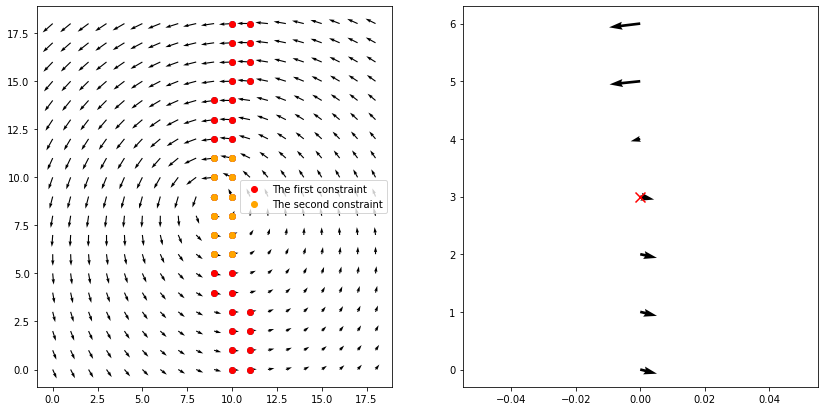

In [7]:
candidate3 = second_constraint(testU, candidate2)
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.quiver(testU, testV)
plt.scatter(candidate[...,1], candidate[...,0])
plt.scatter(candidate2[..., 1], candidate2[..., 0], color='red', label='The first constraint')
plt.scatter(candidate3[..., 1], candidate3[..., 0], color='orange', label='The second constraint')
plt.legend()
plt.subplot(1,2,2)
p = candidate3[2]

plt.quiver(np.zeros(7), np.arange(0,7), testU[p[0]-3:p[0]+4,p[1]], testV[p[0]-3:p[0]+4,p[1]])
plt.scatter(0, 3, s=100, marker='x', color='red')
plt.show()

## 第三约束条件 ##
在以候选点为中心, 2\*b为边长的方形区域范围内寻找速度最小值点，该速度最小值点成为新的候选点

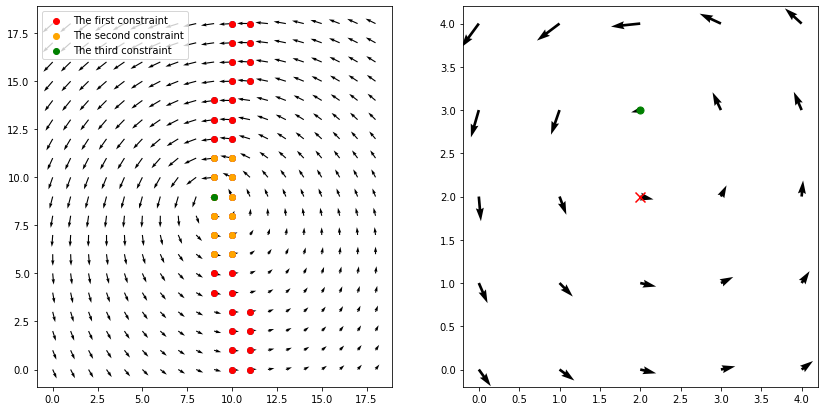

In [117]:
candidate4 = third_constraint(testU, testV, candidate3)
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.quiver(testU, testV)
plt.scatter(candidate[...,1], candidate[...,0])
plt.scatter(candidate2[..., 1], candidate2[..., 0], color='red', label='The first constraint')
plt.scatter(candidate3[..., 1], candidate3[..., 0], color='orange', label='The second constraint')
plt.scatter(candidate4[..., 1], candidate4[..., 0], color='green', label='The third constraint')
plt.legend()
plt.subplot(1,2,2)

p = candidate4[0]
p0 = candidate3[2]

plt.quiver(testU[p0[0]-2:p0[0]+3,p0[1]-2:p0[1]+3], testV[p0[0]-2:p0[0]+3,p0[1]-2:p0[1]+3])
plt.scatter(2, 2, marker='x', color='red', s=100)
plt.scatter(2+(p[1]-p0[1]), 2+(p[0]-p0[0]), s=50, color='green')
plt.show()

## 第四约束条件 ##
以候选点划定以2\*a-1为边长的方形区域, 考察区域边界上点的速度变化特征(图中蓝色点), 从边界左下角出发逆时针回到出发点,期间的速度矢量必须逆时针连续旋转, 且相邻两点旋转角度的变化量不超过90°

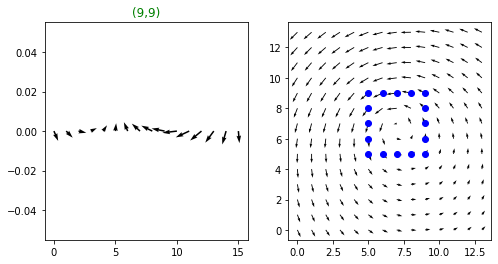

In [120]:
candidate5 = last_constraint(testU, testV, candidate4, debug=True)